In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import eda_helper_functions
from functools import lru_cache
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim

In [61]:
geolocator = Nominatim(user_agent="MyApp")

In [3]:
## Reading train data

train = pd.read_csv(r"C:\Users\yashg\OneDrive\Desktop\flight-sagemaker\data\train.csv")

In [4]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2,10975
3,IndiGo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0,5678


In [5]:
train.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
price              0
dtype: int64

In [6]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
price               int64
dtype: object

In [7]:
## Fizing datatypes

for col in ['date_of_journey', "dep_time", "arrival_time"]:
    train[col] = pd.to_datetime(train[col], dayfirst=True, format="mixed")

In [8]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops                 int64
price                       int64
dtype: object

### High-level Summary of Data

In [9]:
train.describe(include=[int,float])

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,637.633702,0.812668,9092.553331
std,504.395941,0.658143,4670.489223
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,515.000000,1.000000,8372.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


In [10]:
train.assign(total_stops=train["total_stops"].astype(object)).describe(include="O")

,airline,source,destination,total_stops
count,6694,6694,6694,6694
unique,9,5,5,4
top,Jet Airways,Delhi,Cochin,1
freq,2387,2781,2781,3638


### High-level analysis of Outliers

In [11]:
# forest = IsolationForest(n_estimators=10, random_state=42)

In [12]:
# (
# 	train
# 	.assign(outlier=forest.fit_predict(
# 		train
# 		.drop(columns="Price")
# 		.select_dtypes(include="number")
# 	))
# 	.query("outlier == -1")
# 	# .duration
# 	# .describe()
# )

### Pair plots

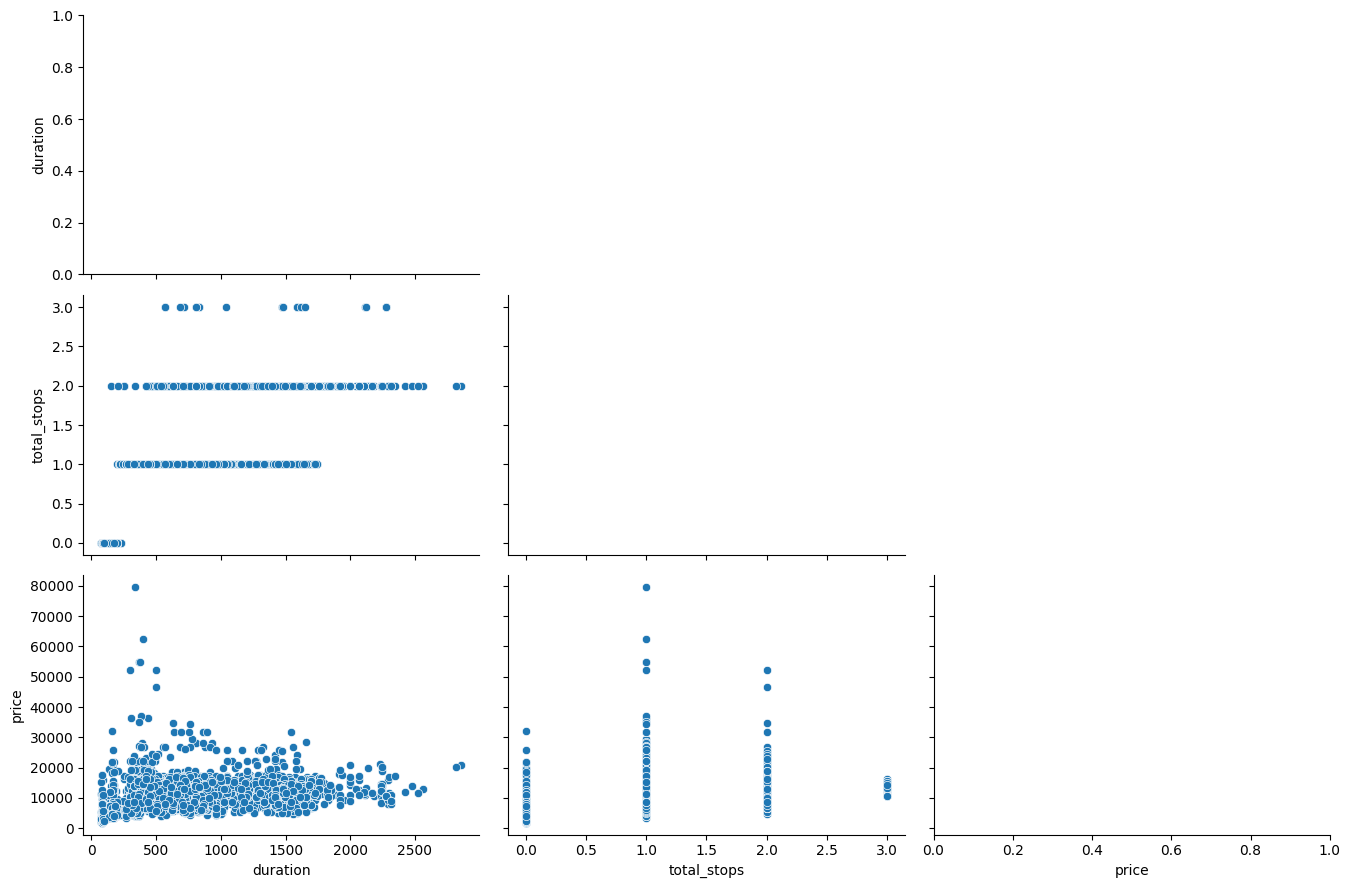

In [13]:
eda_helper_functions.pair_plots(train,)

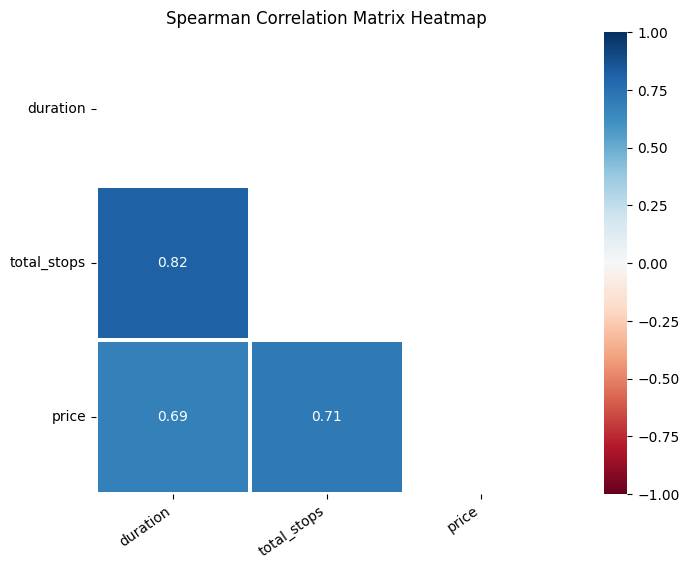

In [14]:
eda_helper_functions.correlation_heatmap(train)

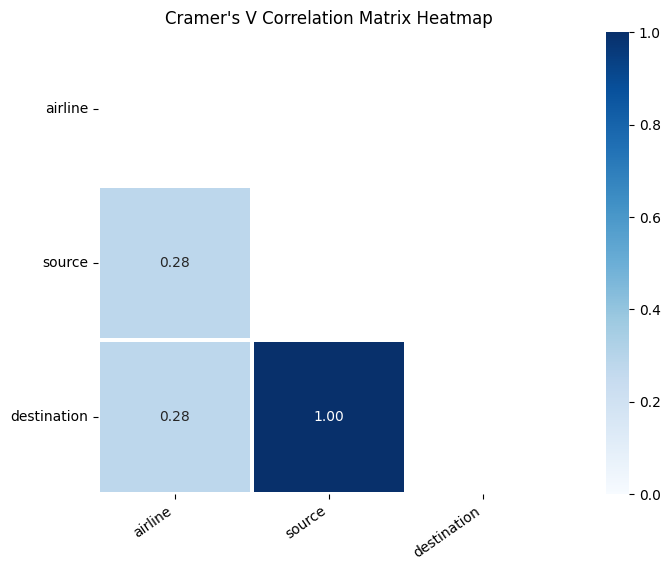

In [15]:
eda_helper_functions.cramersV_heatmap(train)

## Detailed Aalysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'price'],
      dtype='object')

## 1 Airline

In [17]:
eda_helper_functions.cat_summary(train,"airline")

0             Jet Airways
1             Jet Airways
2               Air India
3                  IndiGo
4             Jet Airways
              ...        
6689             SpiceJet
6690    Multiple carriers
6691            Air India
6692             Air Asia
6693    Multiple carriers
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2387


,count,percentage
category,,
Jet Airways,2387,0.356588
IndiGo,1281,0.191365
Air India,1087,0.162384
Multiple carriers,768,0.114730
SpiceJet,534,0.079773
Vistara,301,0.044966
Air Asia,215,0.032118
GoAir,120,0.017927
Trujet,1,0.000149


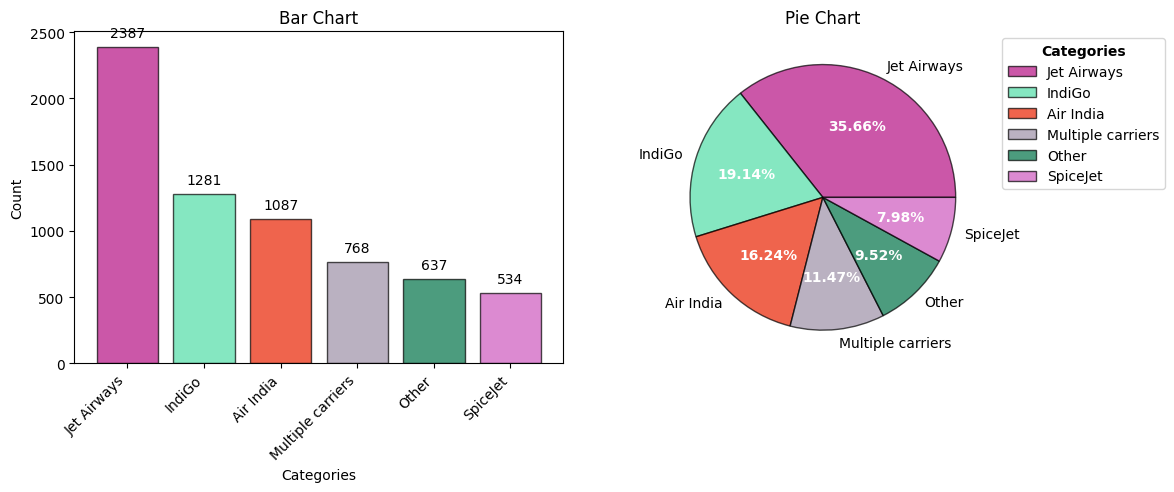

In [18]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False, k=5)

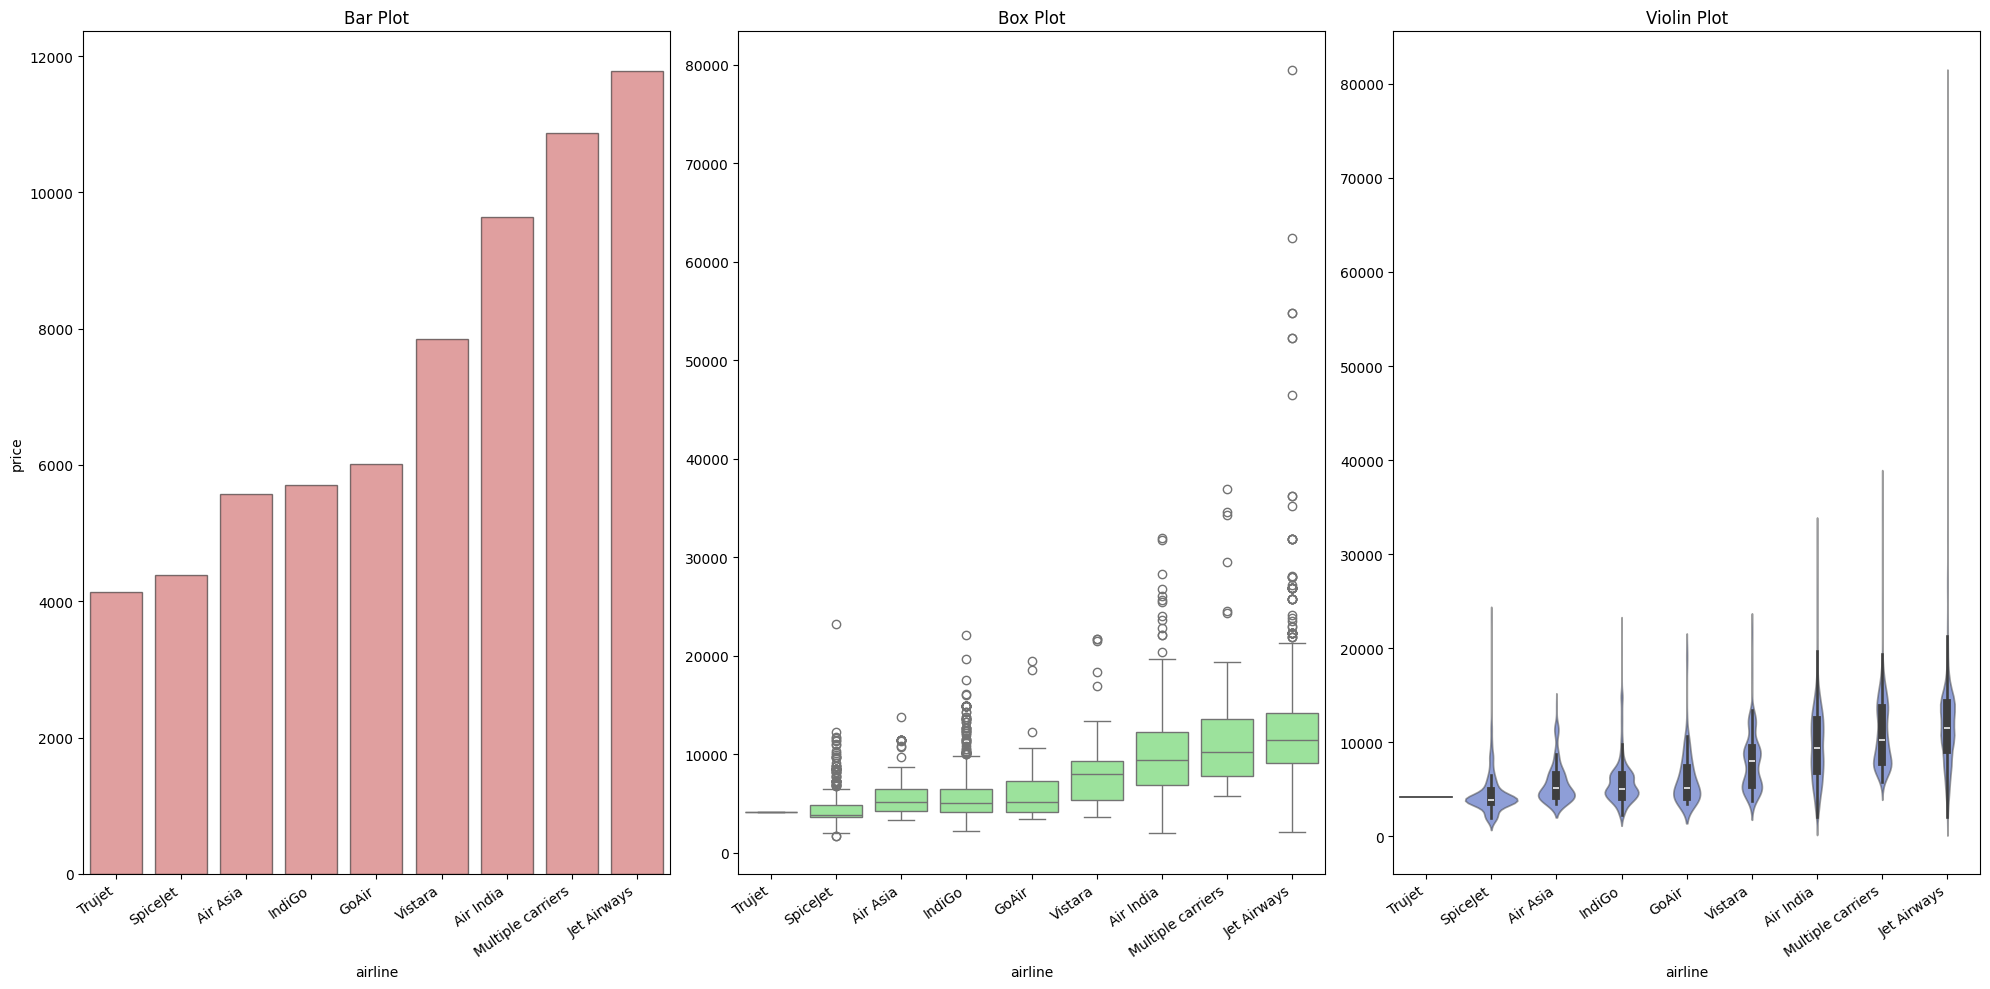

In [19]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="airline",figsize=(20, 10))

In [20]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [21]:
train["airline"].value_counts()

airline
Jet Airways          2387
IndiGo               1281
Air India            1087
Multiple carriers     768
SpiceJet              534
Vistara               301
Air Asia              215
GoAir                 120
Trujet                  1
Name: count, dtype: int64

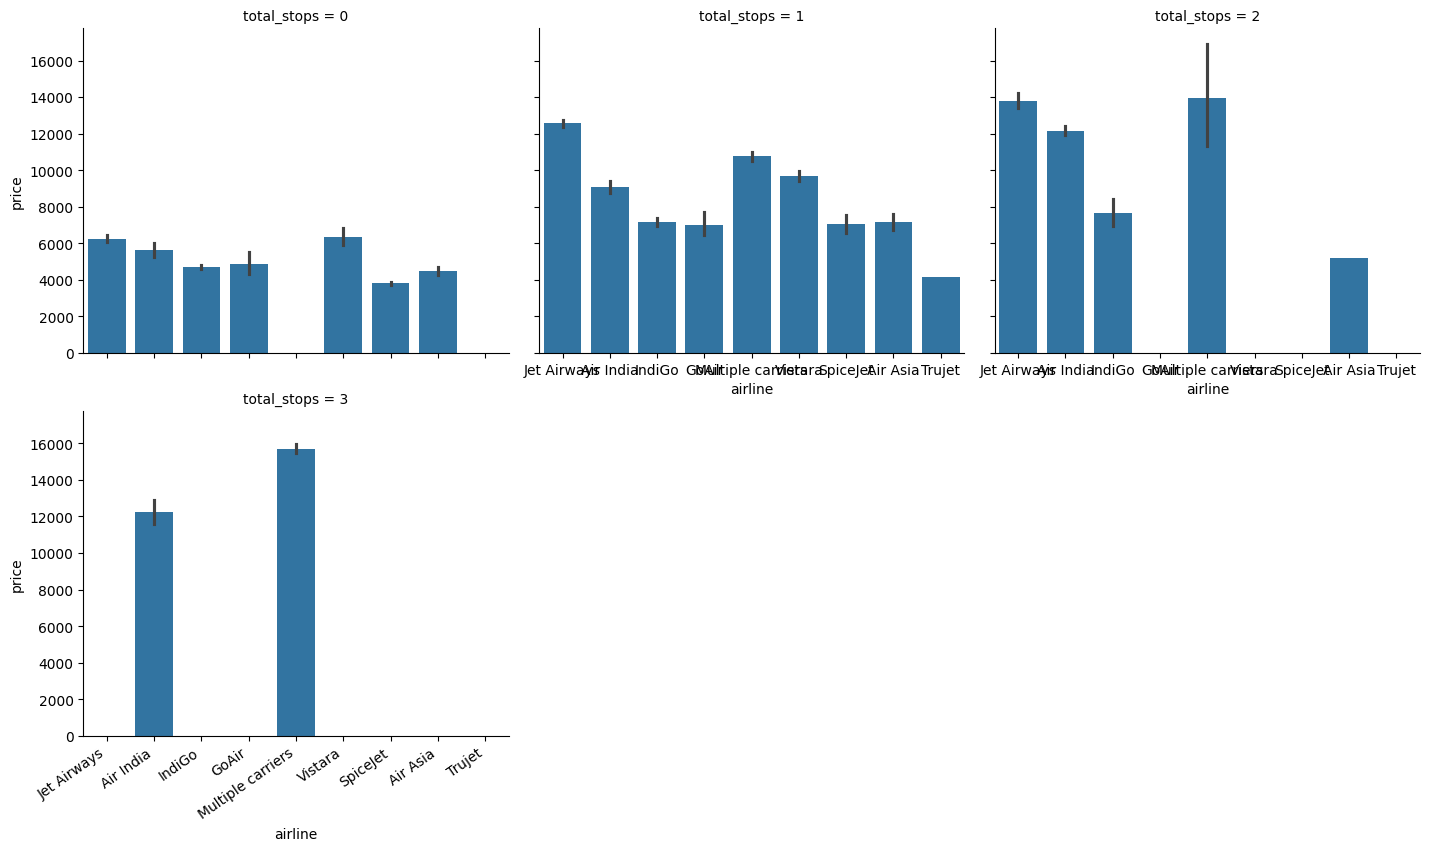

In [22]:
airline_grid = sns.FacetGrid(
	data=train,
	col="total_stops",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

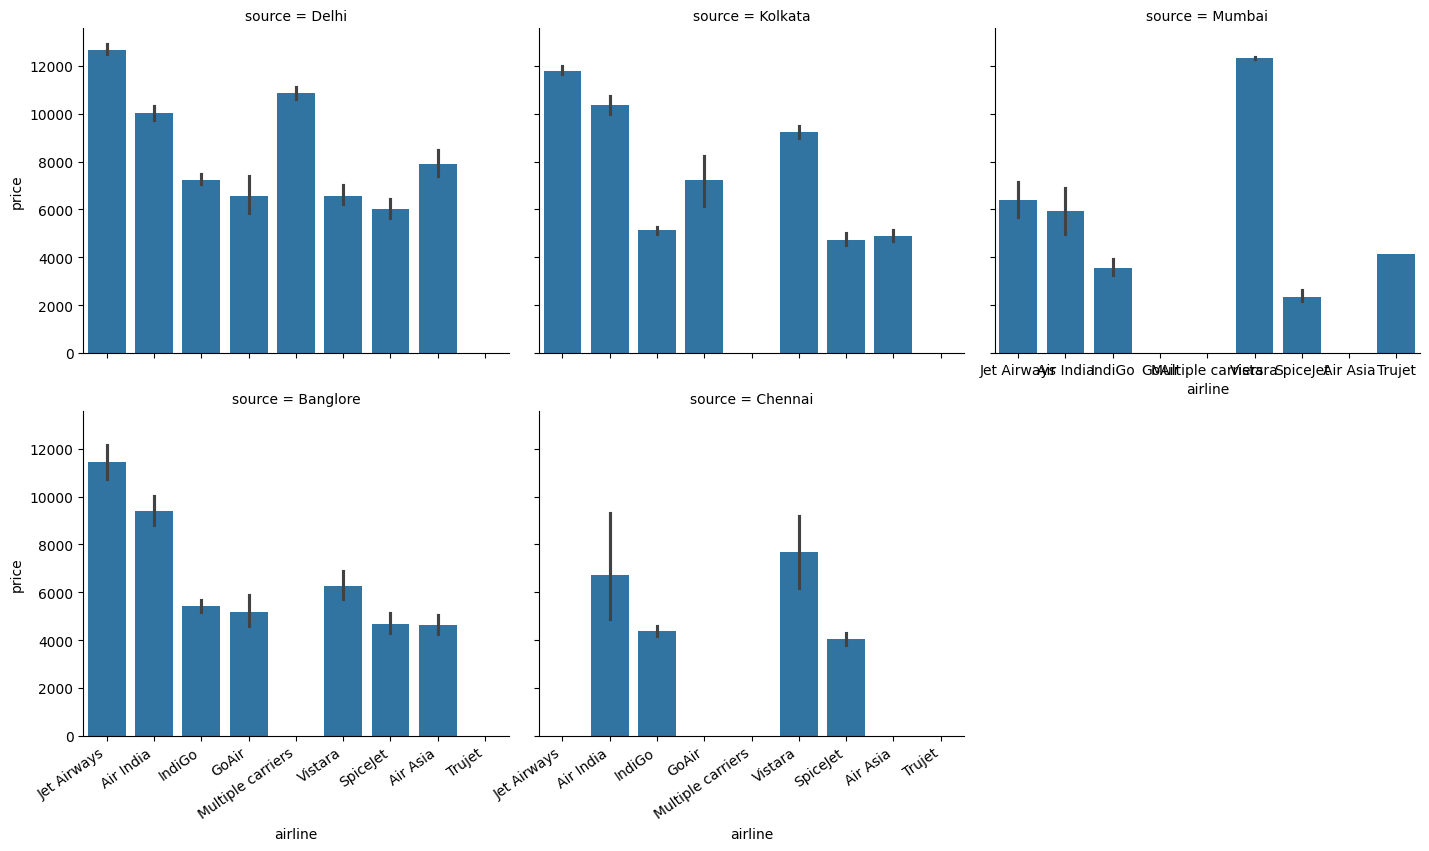

In [23]:
airline_grid = sns.FacetGrid(
	data=train,
	col="source",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

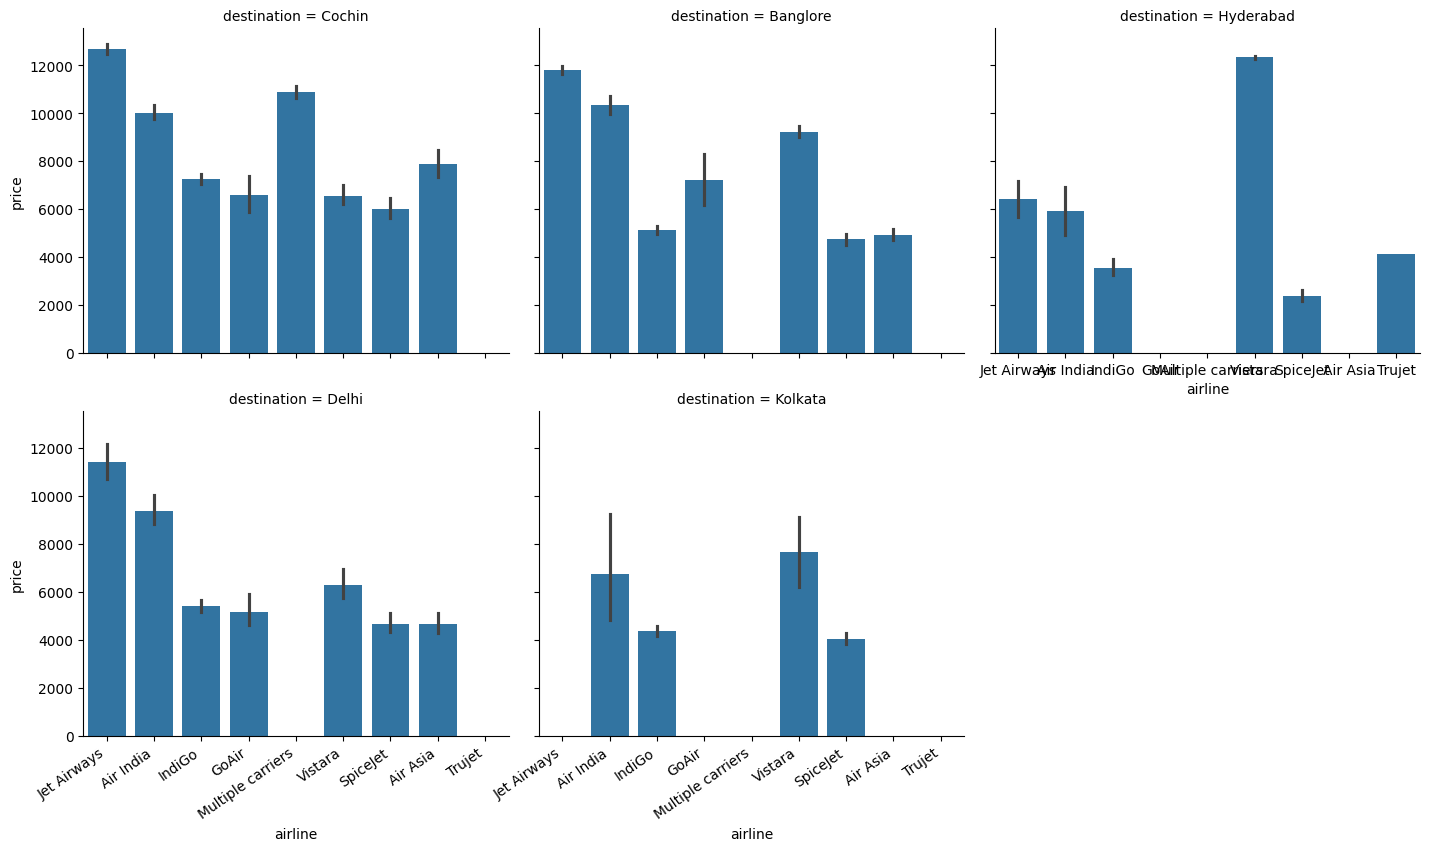

In [24]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### Observation of airline column

- Many airlines have a smaller representation, so we can group them together under the 'Other' category to simplify the analysis.
- Several airlines show significant price outliers, so it's important to address these discrepancies to maintain accurate price analysis.
- The 'airline' feature shows a strong correlation with the target variable (price), which aligns with expectations and should be factored into the model.

### 2. date_of_journey 

In [26]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'price'],
      dtype='object')

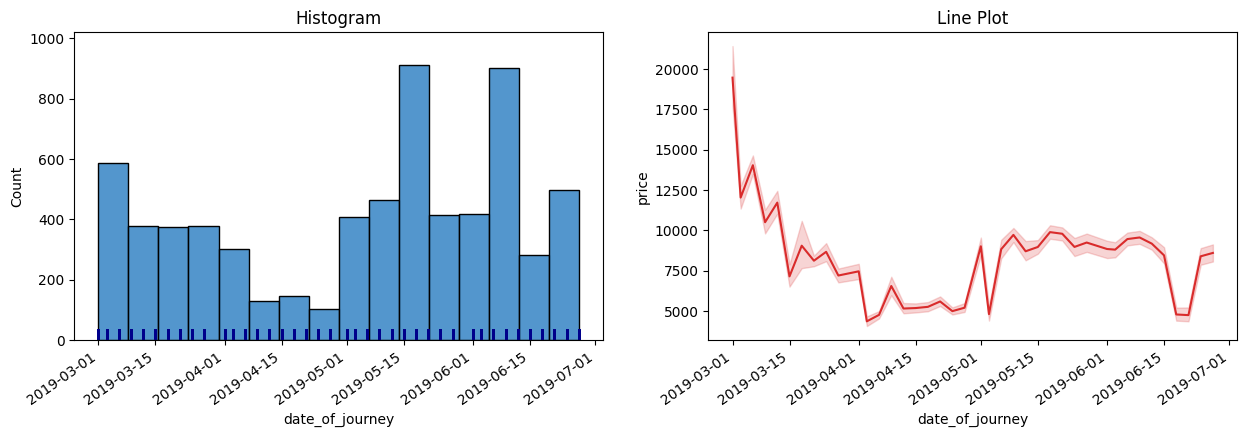

In [27]:
eda_helper_functions.dt_univar_plots(data = train, var="date_of_journey", target="price")

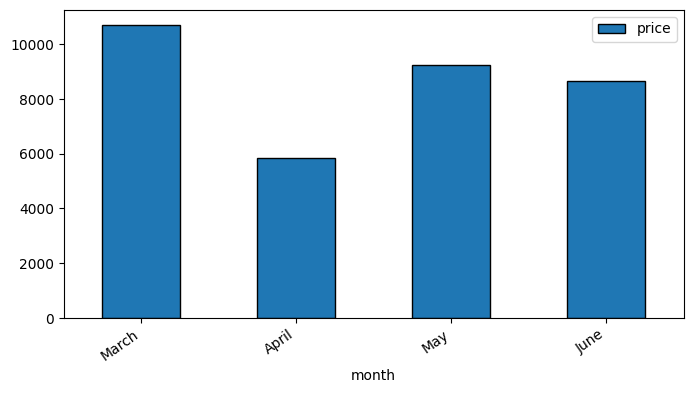

In [28]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

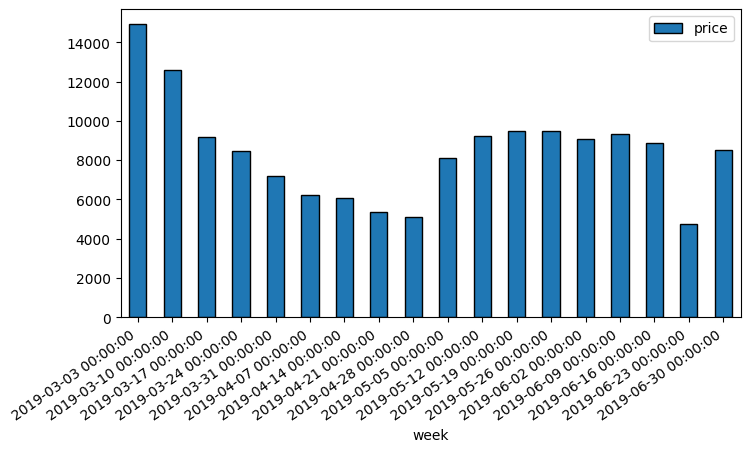

In [29]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

In [30]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'price'],
      dtype='object')

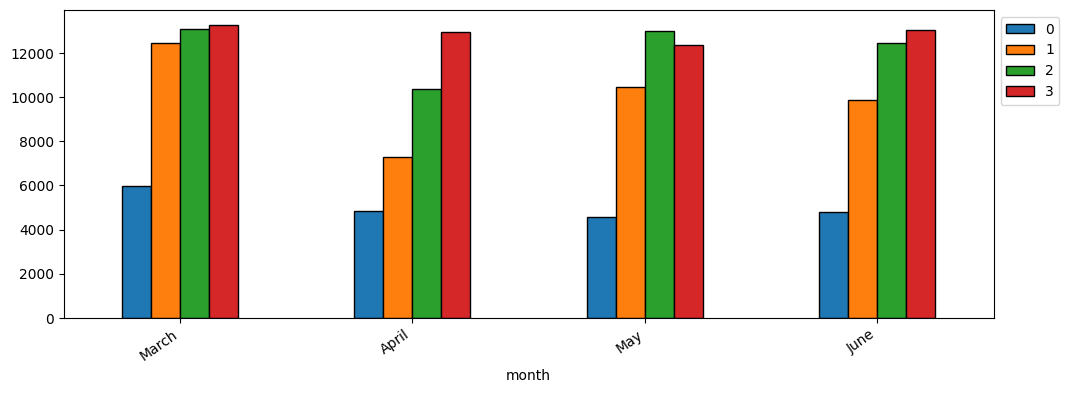

In [31]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "total_stops"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

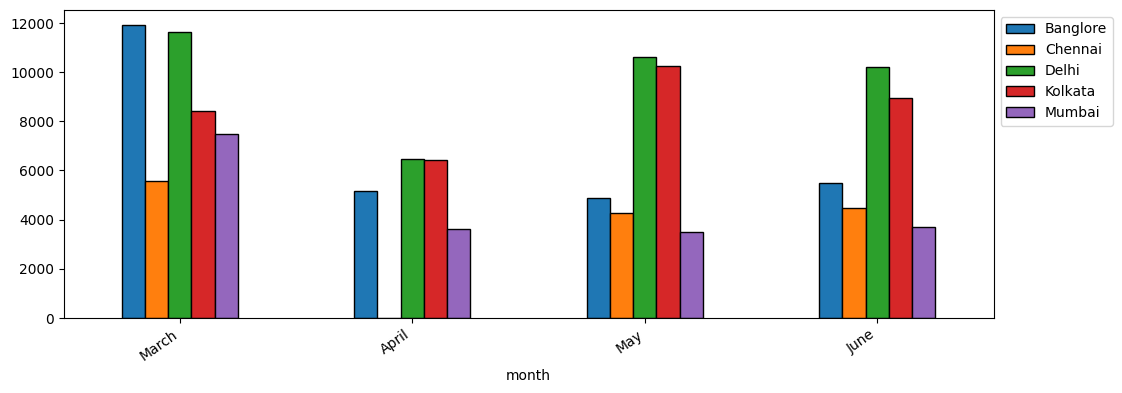

In [32]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

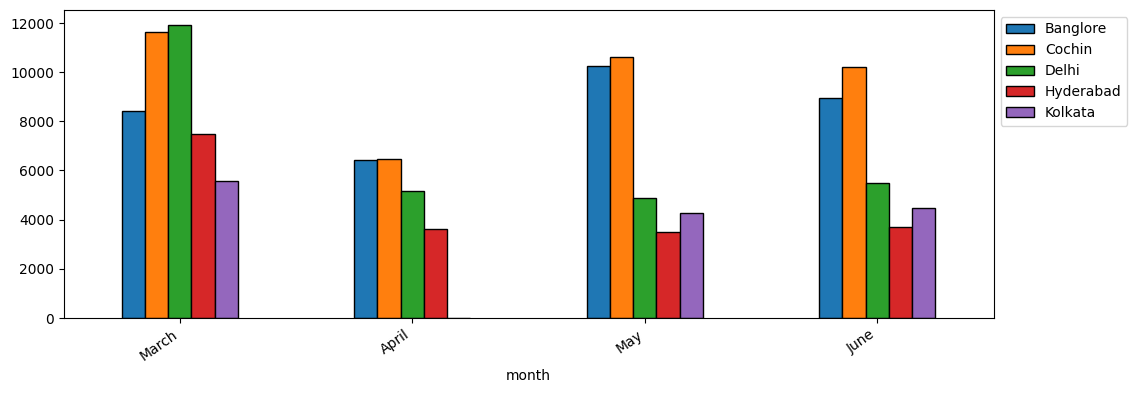

In [33]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "destination"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### Analysis of Date of journey

- Make column of no. of flights in a week, month.
- We can see price is directly propotional to total stops, but this should not be correct.

## 3. Source and destination column analysis

### 3.1 Source

In [34]:
eda_helper_functions.cat_summary(train,"source")

0         Delhi
1       Kolkata
2         Delhi
3        Mumbai
4        Mumbai
         ...   
6689    Kolkata
6690      Delhi
6691      Delhi
6692      Delhi
6693      Delhi
Name: source, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,5
top,Delhi
freq,2781


,count,percentage
category,,
Delhi,2781,0.415447
Kolkata,1878,0.280550
Banglore,1355,0.202420
Mumbai,446,0.066627
Chennai,234,0.034957


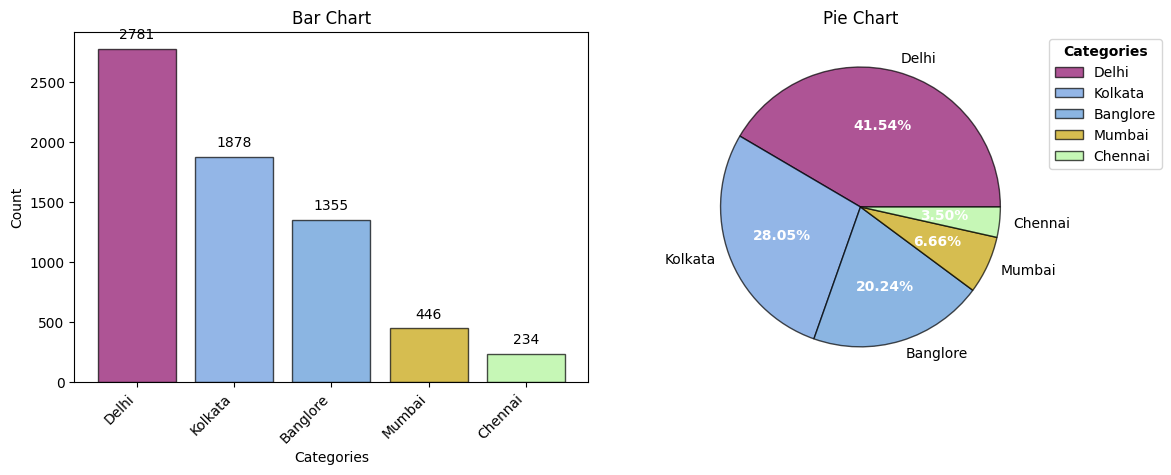

In [35]:
eda_helper_functions.cat_univar_plots(train,"source",show_wordcloud=False)

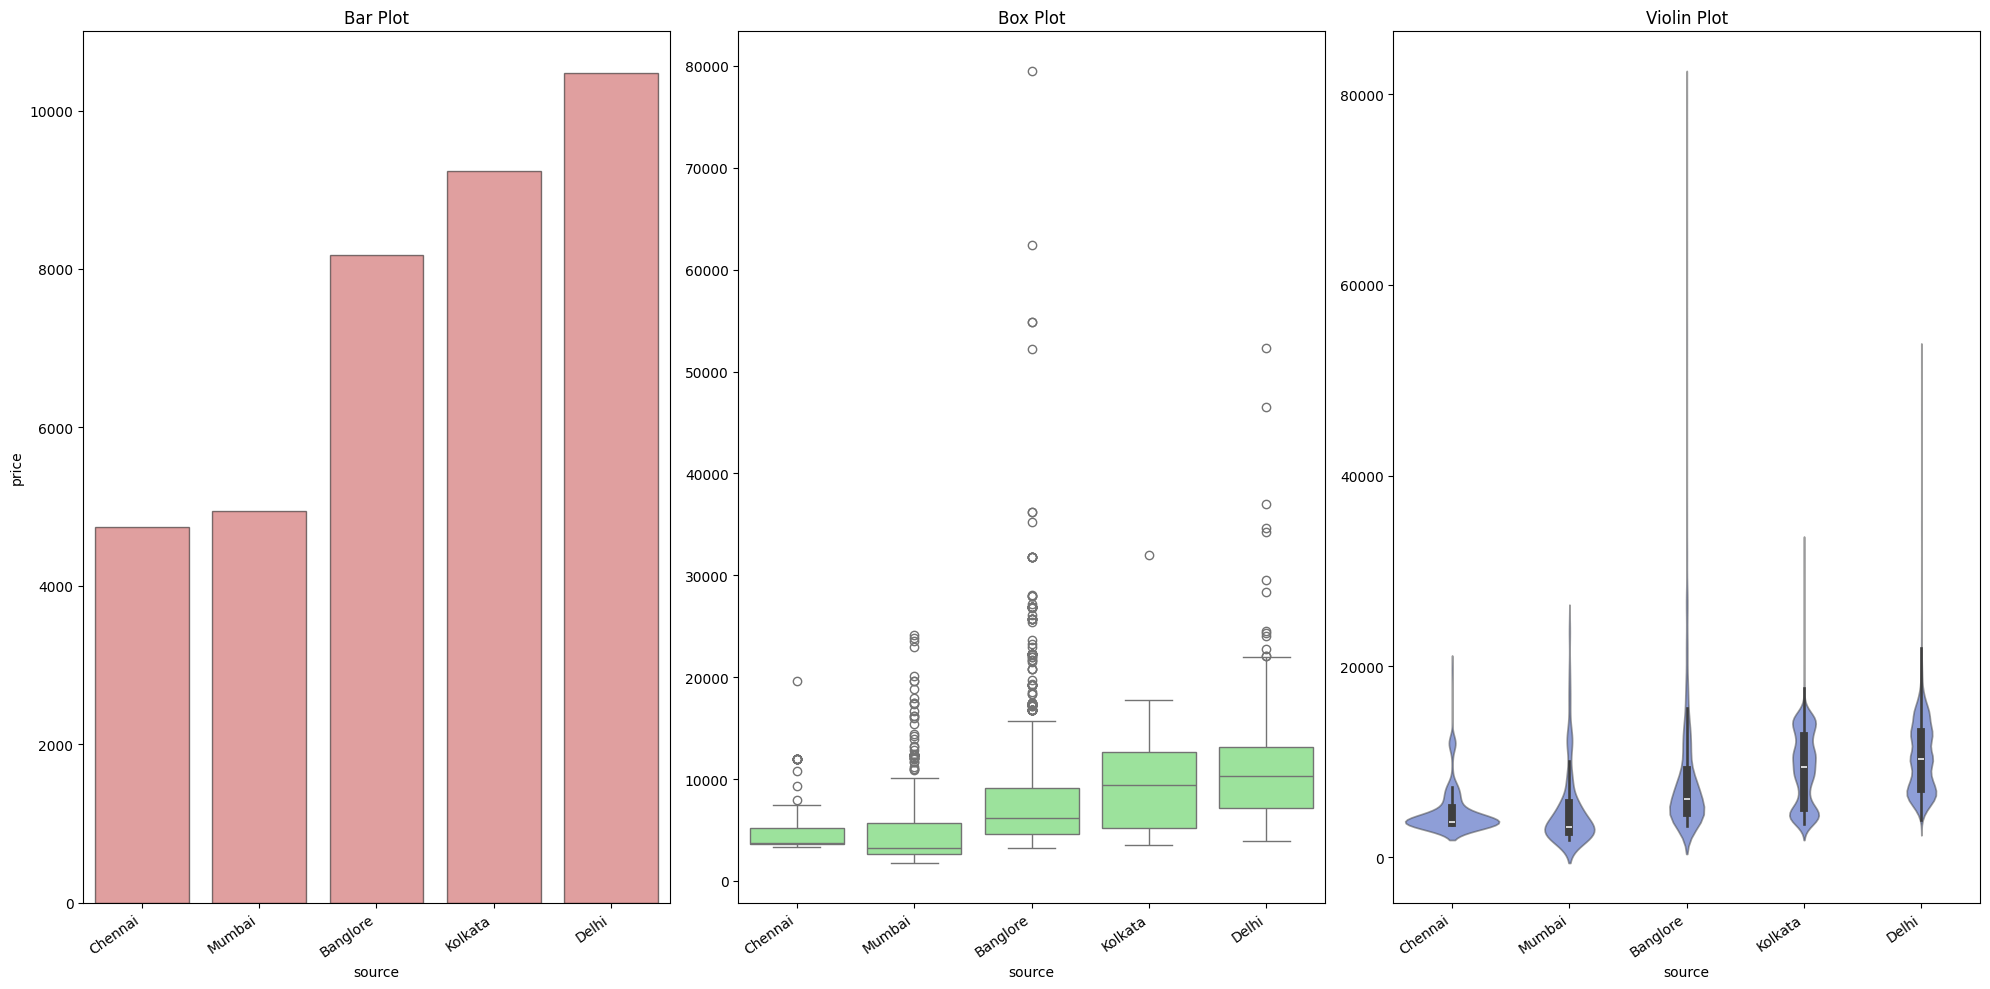

In [36]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="source",figsize=(20, 10))

In [37]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "source")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 244.0297412990894
- p-value              : 5.989541449179653e-196
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


### 3.2 Destination

In [38]:
eda_helper_functions.cat_summary(train,"destination")

0          Cochin
1        Banglore
2          Cochin
3       Hyderabad
4       Hyderabad
          ...    
6689     Banglore
6690       Cochin
6691       Cochin
6692       Cochin
6693       Cochin
Name: destination, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,5
top,Cochin
freq,2781


,count,percentage
category,,
Cochin,2781,0.415447
Banglore,1878,0.280550
Delhi,1355,0.202420
Hyderabad,446,0.066627
Kolkata,234,0.034957


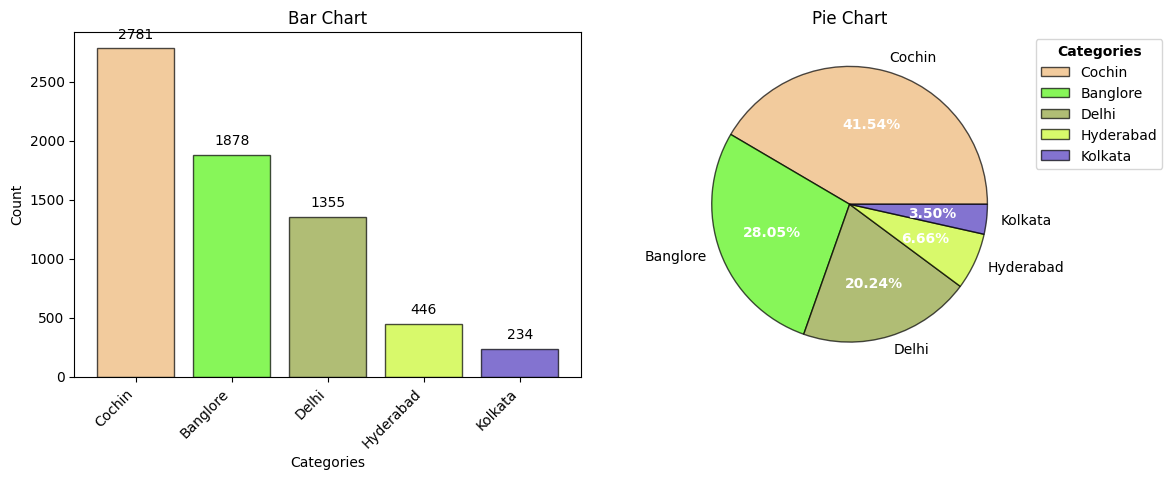

In [39]:
eda_helper_functions.cat_univar_plots(train,"destination",show_wordcloud=False)

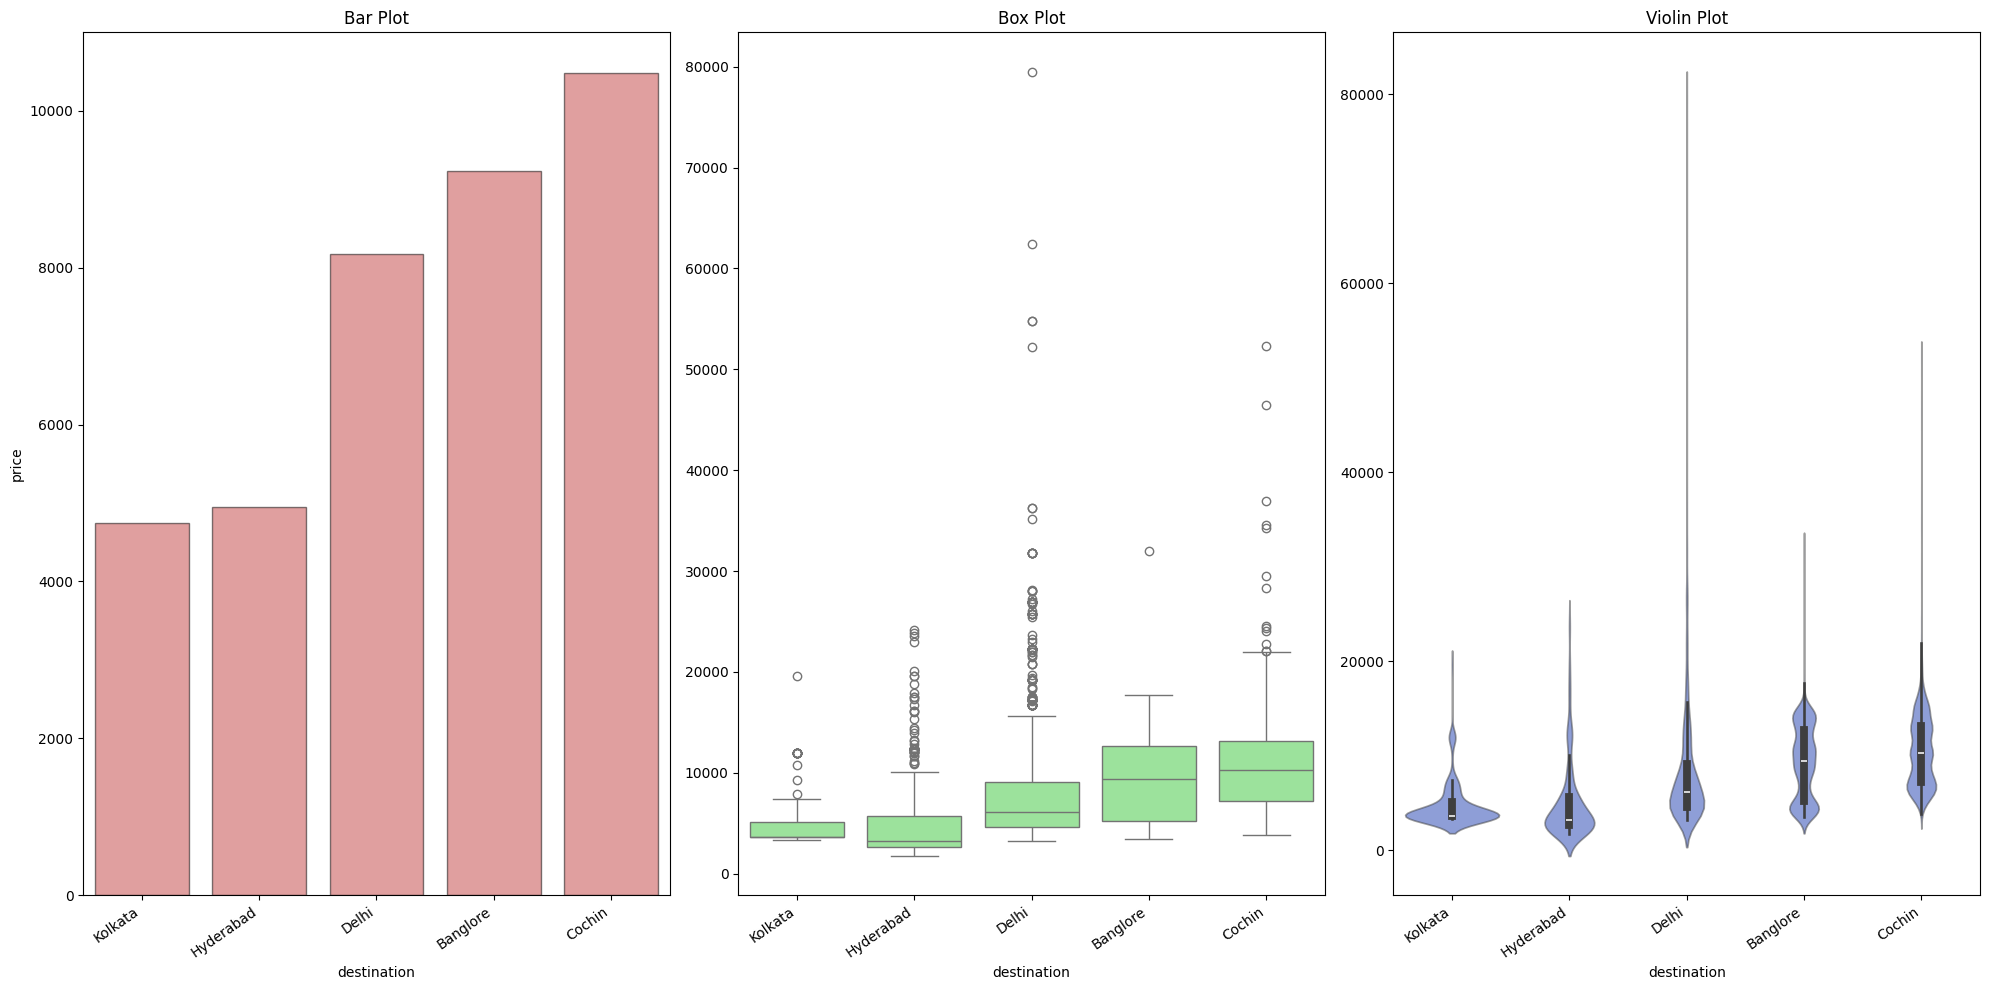

In [40]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="destination",figsize=(20, 10))

In [41]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 244.02974129908935
- p-value              : 5.989541449179653e-196
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


### Analysis of source and destination

- Both source and destination column are significant w.r.t price.
- Again the same problem of outliers we are seeing when we are plotting with price
  

## 4 dep_time and arrival_time

### 4.1 Dep_time

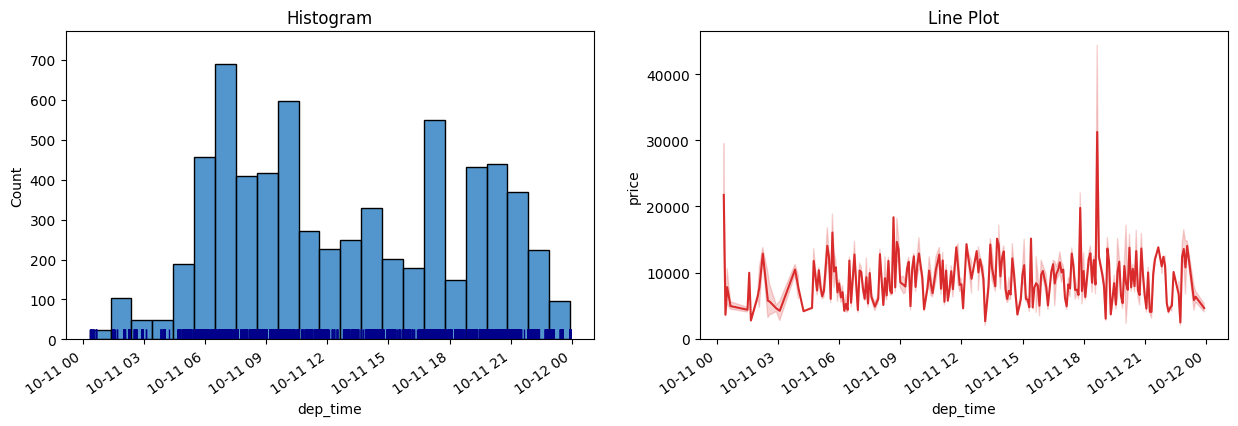

In [42]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

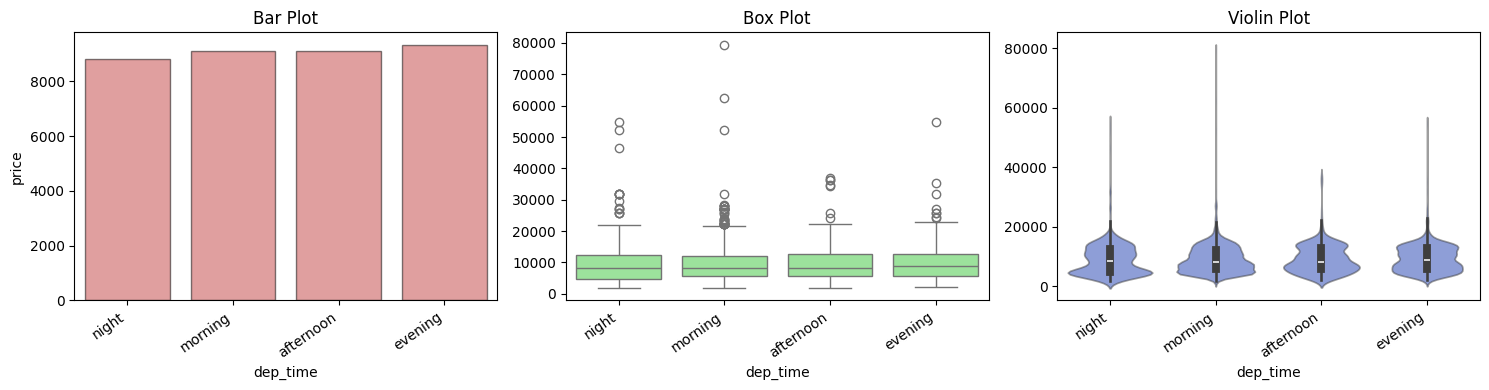

In [43]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 4.2 arrival time

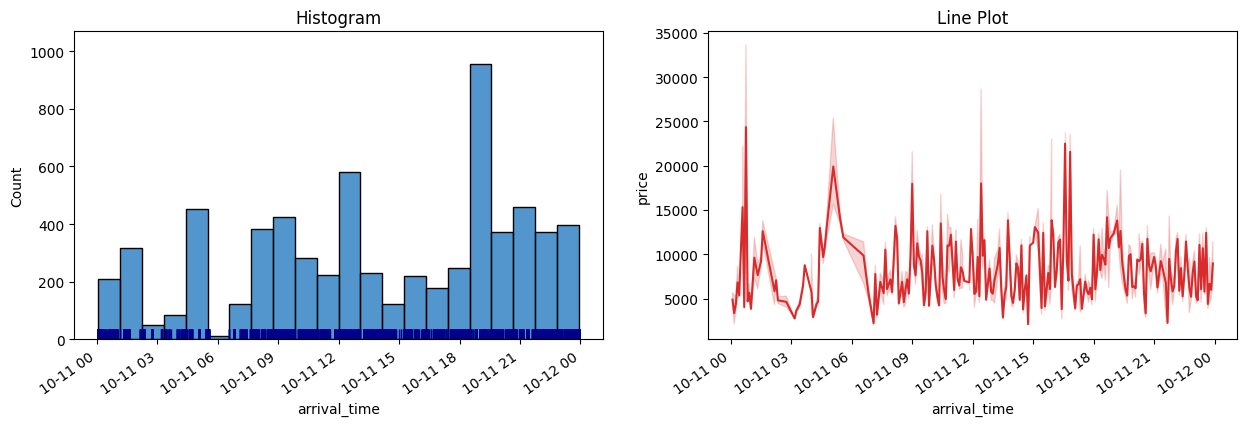

In [44]:
eda_helper_functions.dt_univar_plots(train, "arrival_time", "price")

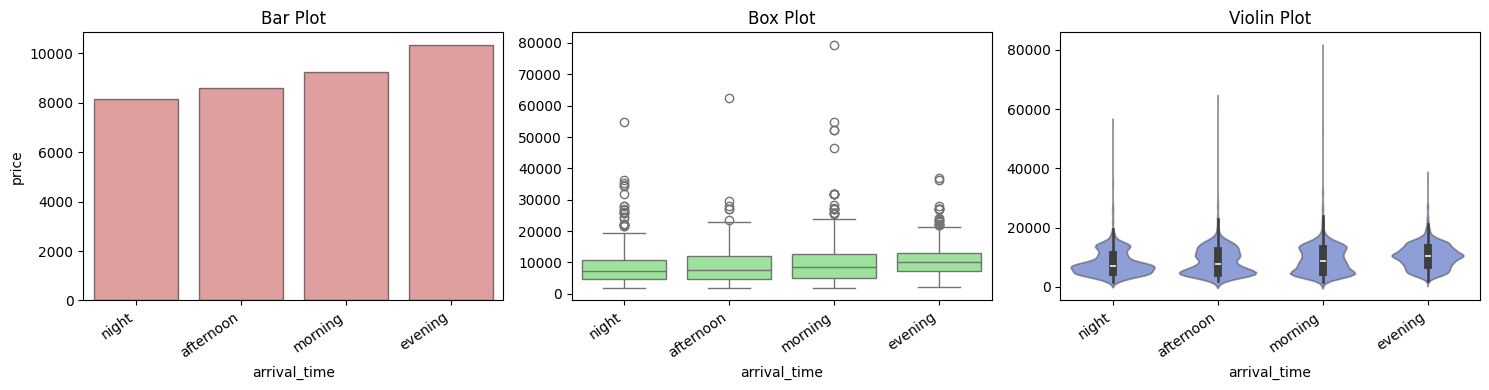

In [45]:
(
	train
	.assign(arrival_time=lambda df_: (
		np.select([df_.arrival_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.arrival_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.arrival_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "arrival_time")
)

### Analysis of Dep time and arrival_time

- For departure time and arrival time, lets make categories for Morning, Afternoon, Evening, Night

## 5 Duration

In [46]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'price'],
      dtype='object')

In [47]:
925-170

755

In [48]:
925.00 + (1.5* 755)

2057.5

In [49]:
eda_helper_functions.num_summary(train, "duration")

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,515.00
75,925.00
90,1443.50
95,1596.75
99,1925.00


,value
mean,637.633702
trimmed mean (5%),603.744607
trimmed mean (10%),575.500373
median,515.000000


,value
var,254415.264879
std,504.395941
IQR,755.000000
mad,345.000000
coef_variance,0.791043


,value
skewness,0.902919
kurtosis,-0.006774


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8882866501808167
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


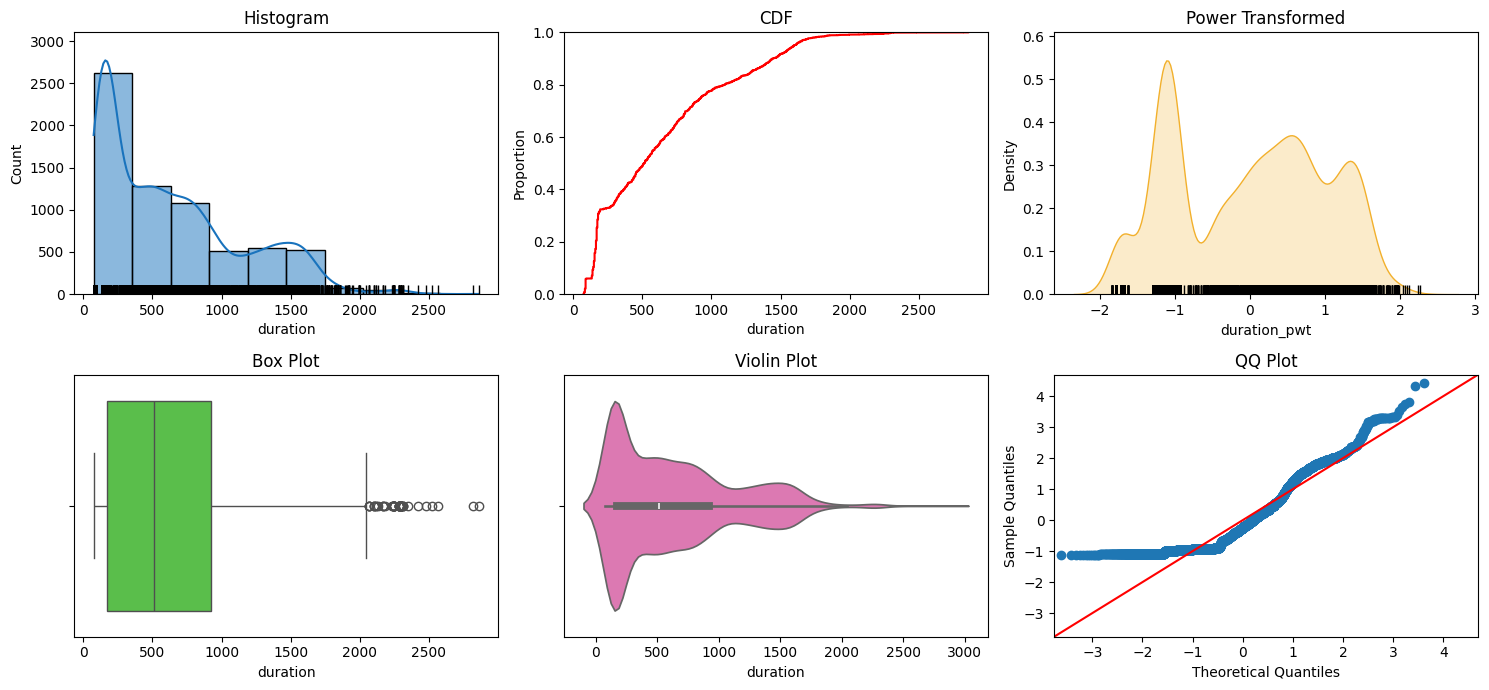

In [50]:
eda_helper_functions.num_univar_plots(train, "duration")

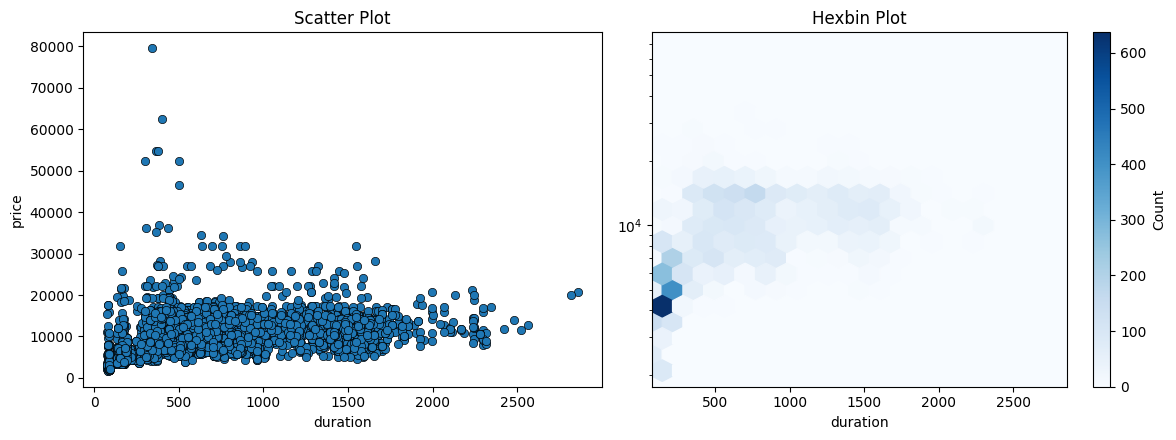

In [51]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [52]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4883580202726645
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.685936761630648
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


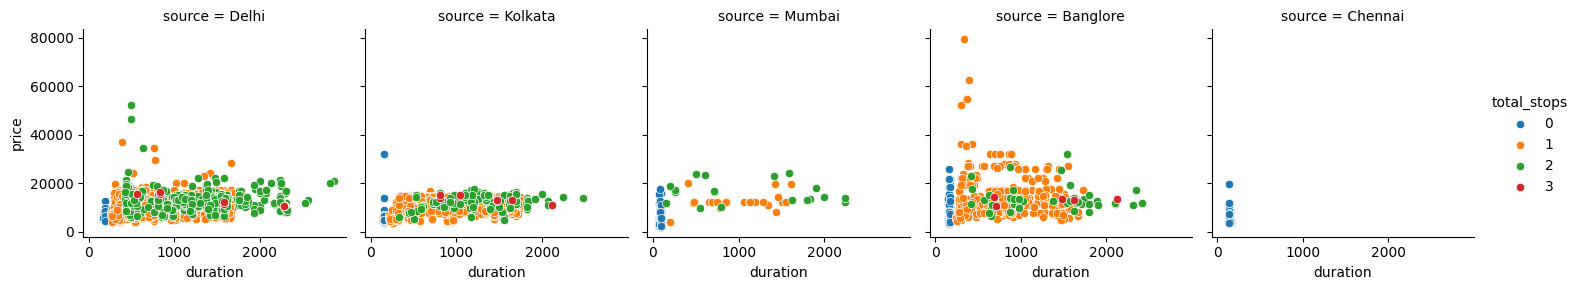

In [53]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [54]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -962.5
Upper Limit : 2057.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,price
271,Air India,2019-05-15,Kolkata,Banglore,2024-10-11 05:50:00,2024-10-11 16:15:00,2065,2,12723
3687,Air India,2019-05-01,Kolkata,Banglore,2024-10-11 05:50:00,2024-10-11 16:15:00,2065,2,10991
6076,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-11 17:55:00,2024-10-11 04:25:00,2070,2,17072
3223,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-11 17:55:00,2024-10-11 04:25:00,2070,2,15812
1503,Air India,2019-03-18,Banglore,Delhi,2024-10-11 11:05:00,2024-10-11 22:10:00,2105,2,11161
1346,Air India,2019-03-03,Banglore,Delhi,2024-10-11 11:05:00,2024-10-11 22:10:00,2105,2,11948
2988,Air India,2019-03-03,Banglore,Delhi,2024-10-11 11:05:00,2024-10-11 22:10:00,2105,2,11791
730,Air India,2019-05-12,Kolkata,Banglore,2024-10-11 12:00:00,2024-10-11 23:15:00,2115,3,10991
2743,Air India,2019-03-12,Banglore,Delhi,2024-10-11 06:45:00,2024-10-11 18:05:00,2120,3,13387
1138,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-11 16:50:00,2024-10-11 04:25:00,2135,2,19907


<Axes: xlabel='duration', ylabel='Count'>

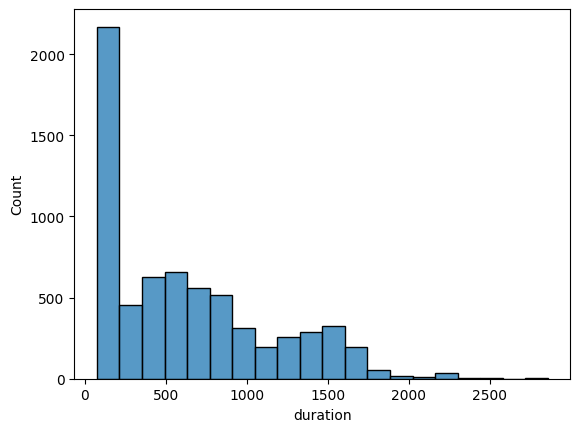

In [55]:
sns.histplot(train["duration"], bins=20)

## 6. additional_info

In [56]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'price'],
      dtype='object')

In [58]:
# eda_helper_functions.cat_summary(train,"additional_info")

In [ ]:
# eda_helper_functions.cat_univar_plots(train,"additional_info",show_wordcloud=False)

In [ ]:
# eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="additional_info",figsize=(20, 10))

In [ ]:
# eda_helper_functions.num_cat_hyp_testing(train, "price", "additional_info")

## 7. Distance b/w source and destination

In [62]:
# Use caching to store previously computed distances
@lru_cache(maxsize=None)
def get_lat_long(city):
    """Get latitude and longitude for a given city."""
    location = geolocator.geocode(f"{city}, India")
    if location:
        return location.latitude, location.longitude
    else:
        return None

def distance_between_cities(source, destination):
    """Calculate the distance between two cities using geopy."""
    lat_long_city1 = get_lat_long(source)
    lat_long_city2 = get_lat_long(destination)
    
    if lat_long_city1 and lat_long_city2:
        # Calculate distance between the two cities
        distance = GD(lat_long_city1, lat_long_city2).km
        return distance
    else:
        return None  # If one of the locations is not found

train["distance_bw_source_destination"] = train.apply(lambda row: distance_between_cities(row['source'], row['destination']), axis=1)


In [63]:
eda_helper_functions.num_summary(train, "distance_bw_source_destination")

0       2067.985155
1       1562.399645
2       2067.985155
3        620.884739
4        620.884739
           ...     
6689    1562.399645
6690    2067.985155
6691    2067.985155
6692    2067.985155
6693    2067.985155
Name: distance_bw_source_destination, Length: 6694, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,620.884739
5,620.884739
10,1355.300874
25,1562.399645
50,1735.285777
75,2067.985155
90,2067.985155
95,2067.985155
99,2067.985155


,value
mean,1737.469446
trimmed mean (5%),1781.038488
trimmed mean (10%),1805.076870
median,1735.285777


,value
var,142177.835084
std,377.064762
IQR,505.585510
mad,332.699377
coef_variance,0.217020


,value
skewness,-1.515477
kurtosis,2.422833


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.75382399559021
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [64]:
eda_helper_functions.num_num_hyp_testing(train, "price", "distance_bw_source_destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.31237795407115265
- p-value              : 1.9563189391627098e-151
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and distance_bw_source_destination are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.33732226259886333
- p-value              : 8.399783066630399e-178
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and distance_bw_source_destination are correlated


- Add this column in our moel building

## 7. Price

In [65]:
eda_helper_functions.num_summary(train, "price")

0       12898
1       13044
2       10975
3        2227
4        5678
        ...  
6689     8479
6690    15078
6691     8603
6692     8759
6693    11142
Name: price, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,1759.0
5,3543.0
10,3919.0
25,5277.0
50,8372.0
75,12373.0
90,14714.0
95,15764.0
99,22270.0


,value
mean,9092.553331
trimmed mean (5%),8832.197312
trimmed mean (10%),8760.217513
median,8372.000000


,value
var,2.181347e+07
std,4.670489e+03
IQR,7.096000e+03
mad,3.413000e+03
coef_variance,5.136609e-01


,value
skewness,2.062226
kurtosis,16.679394


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.883322536945343
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


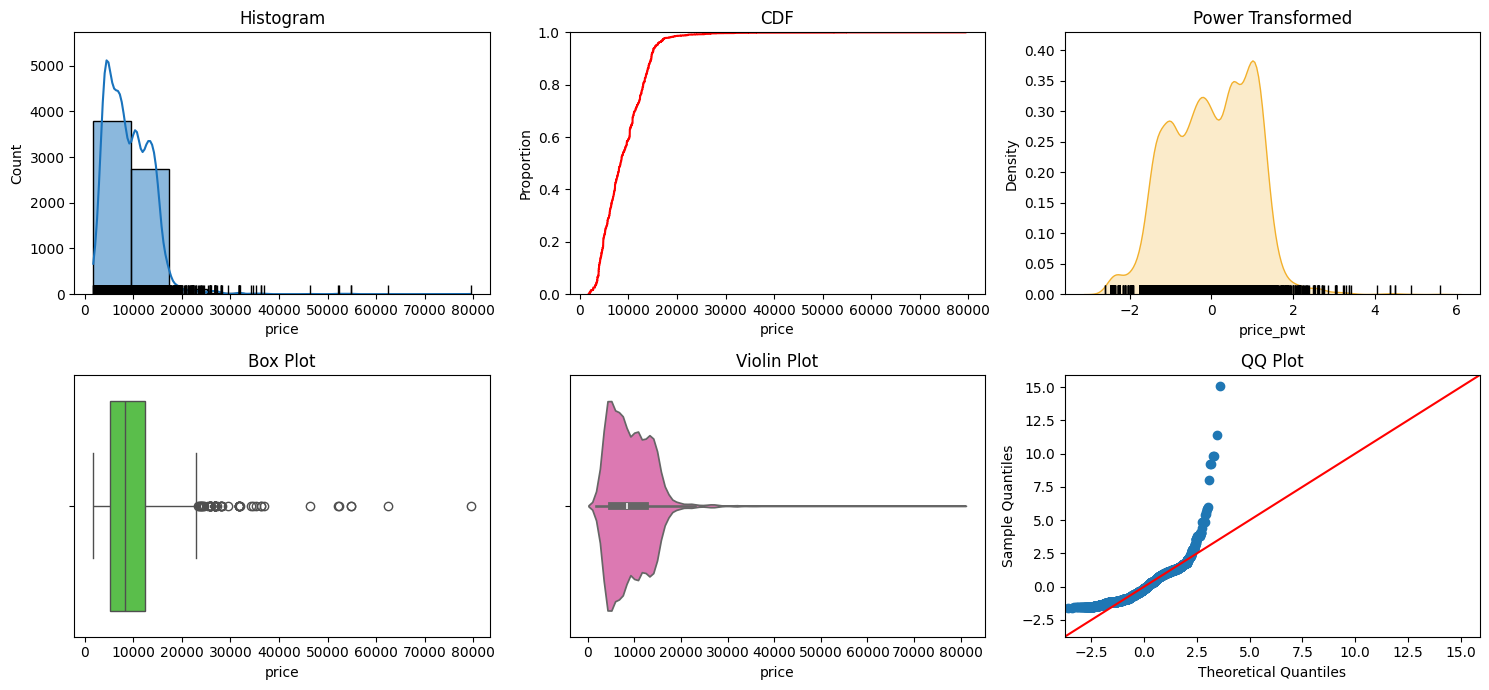

In [66]:
eda_helper_functions.num_univar_plots(train, "price")